In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

2022-05-26 21:17:43.356252: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-26 21:17:43.356277: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


2.9.1
2.9.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [4]:
# Wczytaj dane treningowe i testowe
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

train_set = pd.read_csv('data/adult/adult.data', sep=", ",header = None)
test_set = pd.read_csv('data/adult/adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

train = train_set.replace('?', np.nan).dropna()
test = test_set.replace('?', np.nan).dropna()

train_set.head()


/tmp/ipykernel_1910371/4098396877.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_set = pd.read_csv('data/adult/adult.data', sep=", ",header = None)
/tmp/ipykernel_1910371/4098396877.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_set = pd.read_csv('data/adult/adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Zad.
Zróbmy szybki preprocesing

In [5]:
dataset = pd.concat([train,test])

dataset['wage_class'] = dataset.wage_class.replace({'<=50K.': 0,'<=50K':0, '>50K.':1, '>50K':1})

dataset.drop(["fnlwgt"],axis=1,inplace=True)

dataset.drop(["education"],axis=1,inplace=True)

x = dataset.groupby('native_country')["wage_class"].mean()

d = dict(pd.cut(x[x.index!=" United-States"],5,labels=range(5)))

dataset['native_country'] = dataset['native_country'].replace(d)

dataset = pd.get_dummies(dataset,drop_first=True)

train = dataset.iloc[:train.shape[0]]
test = dataset.iloc[train.shape[0]:]

X_train = train.drop("wage_class",axis=1)
y_train = train.wage_class

X_test = test.drop("wage_class",axis=1)
y_test = test.wage_class


In [6]:
from keras.models import Sequential
from keras.layers import Dense

from keras.callbacks import History

history = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid", input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4200      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________


2022-05-26 21:18:40.345933: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-26 21:18:40.346237: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-26 21:18:40.346323: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-05-26 21:18:40.346389: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-05-26 21:18:40.346455: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [7]:
model.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [9]:
# history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))
history = model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32, epochs=100)

Epoch 1/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3575 - accuracy: 0.8217 - val_loss: 0.3643 - val_accuracy: 0.8146
Epoch 2/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3557 - accuracy: 0.8215 - val_loss: 0.3657 - val_accuracy: 0.8153
Epoch 3/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3568 - accuracy: 0.8202 - val_loss: 0.3638 - val_accuracy: 0.8183
Epoch 4/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3552 - accuracy: 0.8205 - val_loss: 0.3620 - val_accuracy: 0.8204
Epoch 5/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3612 - accuracy: 0.8149 - val_loss: 0.3673 - val_accuracy: 0.8165
Epoch 6/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3569 - accuracy: 0.8195 - val_loss: 0.3635 - val_accuracy: 0.8169
Epoch 7/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3563 - accuracy: 0.8201 - val_loss: 0.3686 - val_accuracy: 0.8166

Epoch 58/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3598 - accuracy: 0.8169 - val_loss: 0.3744 - val_accuracy: 0.8142
Epoch 59/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3620 - accuracy: 0.8165 - val_loss: 0.3691 - val_accuracy: 0.8151
Epoch 60/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3562 - accuracy: 0.8179 - val_loss: 0.3698 - val_accuracy: 0.8161
Epoch 61/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3570 - accuracy: 0.8195 - val_loss: 0.3683 - val_accuracy: 0.8166
Epoch 62/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3604 - accuracy: 0.8174 - val_loss: 0.3678 - val_accuracy: 0.8159
Epoch 63/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3571 - accuracy: 0.8190 - val_loss: 0.3722 - val_accuracy: 0.8169
Epoch 64/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3583 - accuracy: 0.8169 - val_loss: 0.3640 - val_accuracy:

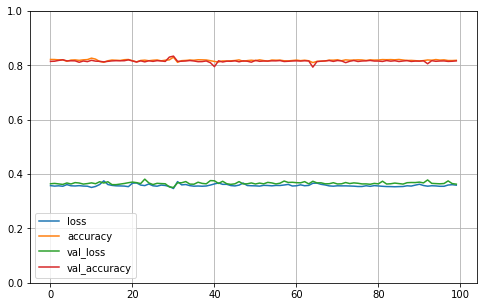

In [10]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [11]:
model.evaluate(X_test,y_test)

471/471 [==============================] - 0s 890us/step - loss: 0.3630 - accuracy: 0.8165


[0.3629651963710785, 0.8164674639701843]

In [15]:
from sklearn import metrics
metrics.accuracy_score(y_true= y_test, y_pred=np.argmax(model.predict(X_test), axis=-1))

471/471 [==============================] - 0s 705us/step


0.7543160690571049

# Zad

Porównaj powyższy wynik z nauką na danych znormalizowanych.

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
history2 = model.fit(X_train_scaled , y_train, validation_data= (X_test_scaled , y_test), batch_size=32, epochs=100)

Epoch 1/100
943/943 [==============================] - 2s 2ms/step - loss: 0.4119 - accuracy: 0.8160 - val_loss: 0.3386 - val_accuracy: 0.8435
Epoch 2/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3303 - accuracy: 0.8464 - val_loss: 0.3309 - val_accuracy: 0.8460
Epoch 3/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3232 - accuracy: 0.8499 - val_loss: 0.3279 - val_accuracy: 0.8477
Epoch 4/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3194 - accuracy: 0.8502 - val_loss: 0.3266 - val_accuracy: 0.8473
Epoch 5/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3169 - accuracy: 0.8515 - val_loss: 0.3242 - val_accuracy: 0.8484
Epoch 6/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3146 - accuracy: 0.8523 - val_loss: 0.3249 - val_accuracy: 0.8475
Epoch 7/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3129 - accuracy: 0.8529 - val_loss: 0.3247 - val_accuracy: 0.8487

Epoch 58/100
943/943 [==============================] - 2s 2ms/step - loss: 0.2567 - accuracy: 0.8792 - val_loss: 0.3738 - val_accuracy: 0.8452
Epoch 59/100
943/943 [==============================] - 2s 2ms/step - loss: 0.2565 - accuracy: 0.8786 - val_loss: 0.3768 - val_accuracy: 0.8435
Epoch 60/100
943/943 [==============================] - 2s 2ms/step - loss: 0.2558 - accuracy: 0.8792 - val_loss: 0.3744 - val_accuracy: 0.8432
Epoch 61/100
943/943 [==============================] - 2s 2ms/step - loss: 0.2551 - accuracy: 0.8801 - val_loss: 0.3781 - val_accuracy: 0.8437
Epoch 62/100
943/943 [==============================] - 2s 2ms/step - loss: 0.2544 - accuracy: 0.8785 - val_loss: 0.3812 - val_accuracy: 0.8376
Epoch 63/100
943/943 [==============================] - 2s 2ms/step - loss: 0.2537 - accuracy: 0.8802 - val_loss: 0.3858 - val_accuracy: 0.8418
Epoch 64/100
943/943 [==============================] - 2s 2ms/step - loss: 0.2525 - accuracy: 0.8798 - val_loss: 0.3851 - val_accuracy:

# Zad. 
Stwórz wykres porównujący metody. 

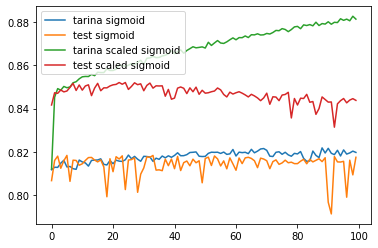

In [22]:
# don't touch to not lose this diagram

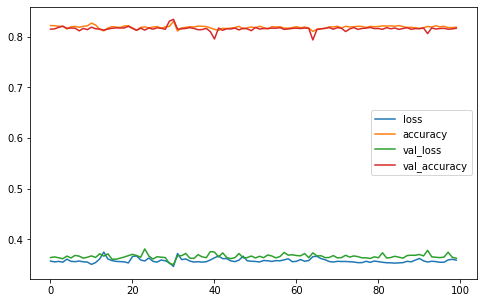

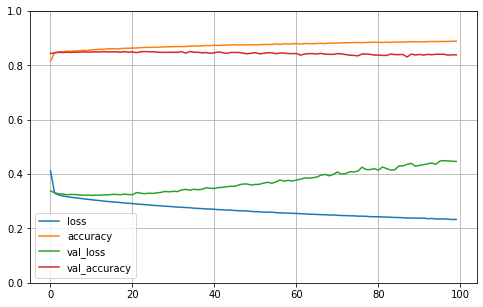

In [17]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()